<h1 align="center">LING530F: Deep Learning for NLP</h1>
<h1 align="center">Assignment 1 : Word Embeddings</h1>
<h2 align="center"> Arun Rajendran(86611860)</h2>

### *First, Lets download the data from drive. For this we can use the GoogleDriveDownloader package.*

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='0B046sNk0DhCDY1B1NGZOOEFUa1E',                 # Id of file to be downloaded
                                    dest_path='data/yelp_academic_dataset_review_preprosessd.json')     # Destination path

## 1. Writing text field of reviews to Text File
### Required: Extract all the text fields from the YELP dataset, and write these fields into a single text file

### *Now, Lets read the json file line by line using json.loads() function and write the 'text' field of each review into the text file if reading the line doesnt produce a error. We print the line and continue reading the json file if there is an error.*

In [2]:
import json
f = open('data/yelp_academic_dataset_review_preprosessd.json',mode='r')        # Open the json file in read mode
line = f.readline()
out = open('yelp_text_data.txt',mode='w')                                      # Open text file in write mode
while line:
    line = f.readline()                                                        # Read one line on json file
    try:
        review=json.loads(line)                                                # Get the review from the line
    except:
        print(line)
        continue                                        # Print line causing error and continue while writing other lines
    out.write(review['text'])                           # Write the text field of review to text file
    out.write('\n')
f.close()  
out.close()                                             # Close both text file & json file

{"text": "Pepe's has great Mexican food and a pretty extensive menu, but I always seem to order the same items: a chile relleno burrito, a chorizo and egg burrito, or birria (goat) or carne asda tacos. Today I came for breakfast, so it was one chorizo and egg burrito and two carne asda tacos, which I took home to split with my husband.\n\nAs usual, the food was delish, but the only reason I can't give it 5 stars is because the burrito was so dang greasy. Yeah, I know chorizo is greasy, but this was WAY too greasy ... like the tortilla was completely soaked through.\n\nI do love their chile relleno burrito, which is one of the best burritos I've ever had. And their goat tacos are fantastic. So maybe next time I'll skip the chorizo and stick with the chile relleno. You can't go wrong with any of their tacos, which are served street-style in small corn tortillas. And while I've never tried them, the carne asada fries seem to be popular. \n\nJust lighten up on the grease, please...", "revi

## 2. Word Frequency Dictionary & Top 20 words
### Required: Extract a word frequency dictionary of the data, and print the top most frequent 20 words.

### *Lets create a dictionary of word frequencies by reading saved file line by line and incrementing the count of appropriate words*

In [0]:
wordsfreq={}                                      # Create dictionary 
f = open('yelp_text_data.txt',mode='r')           # Open text file in read mode
for line in f:
    for word in line.split(' '):                  # Split lines by spaces to get words
        if(word in wordsfreq.keys()):
            wordsfreq[word]=wordsfreq[word]+1     # Update frequencies for existing words
        else:
            wordsfreq[word] = 1                   # Include the word in dictionary and assign value to 1

 ### *Lets create a counter object using our dictionary as argument to identify the most common words*

In [4]:
from collections import Counter
c = Counter(wordsfreq)                          # Create counter object of wordsfreq dictionary
c.most_common(20)                               # Print the 20 words with highest frequencies

[('the', 980843),
 ('and', 792376),
 ('I', 664915),
 ('a', 606675),
 ('to', 593695),
 ('', 488433),
 ('was', 377753),
 ('of', 346683),
 ('\n', 330804),
 ('is', 301144),
 ('for', 278723),
 ('in', 262841),
 ('it', 208390),
 ('my', 202606),
 ('that', 201489),
 ('The', 196089),
 ('with', 183760),
 ('have', 167766),
 ('but', 160038),
 ('you', 156674)]

## 3. Preprocessing using NLTK
### Required: Use NLTK or SpaCy to remove stop words, tokenize, and pos tag the data. See here, for example.

### *As you can see, the most common words are those like "a","the","to","and" which provide little to no information for any NLP task and are usually termed as stop words. It is often better to remove these words and we can do the same using NLTK library. *

### *Firstly, we tokenize the sentences and hen remove stop words. Lastly, we store the tokens of the sentences with their pos tags in a list.*

In [0]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# Get the stop words defined in nltk for english
stop_words = set(stopwords.words('english'))                             

# Create filtered & tagged sentences as list
tagged_sentences=[]
filtered_sentences=[]                                                    


# Open the text file in read mode
f = open('yelp_text_data.txt',mode='r')                                  

for line in f:
        # Tokenize each line
        word_tokens = word_tokenize(line)                                 
        # Filter the tokens without stop words and put them in a list
        sentence = [w for w in word_tokens if not w in stop_words]
        # Append the sentence(a list) to filtered sentences
        filtered_sentences.append(sentence)                              
        # Append the pos tags of the sentence(list of tuples) to tagged sentences
        tagged_sentences.append(nltk.pos_tag(sentence))                  

## 4a. Histogram Frequency of Word Frequencies
### Required: Plot a histogram of the the frequencies of a random sample of tokens in the data (pick 100 tokens).For example, suppose the word "cat" occurred 10K times and the word "elephant" occurred 7k times. You just need to produce a histogram with these frequencies. Note: you can take the log of each frequency and just plot the logs. You can use matplotlib for your visualizations. Another cool library is seaborn.

### *Lets create a dictionary with words as keys and dictionary of tags and their counts as values. For example, if we have abcd:{'NN:10,...'} in the dictionary it implies that the word abcd was tagged as NN in 10 of the sentences. This will help us understand the distribution of words across different pos tags.*

In [0]:
# Create dictionary of tags & counts for each word
word_tags_count={}                                                                      
for line in tagged_sentences:
    for item in line:
        # Check if word is already in the dictionary                         
        if(item[0] in word_tags_count.keys()):              
            # Check if tag is already present as key in the dictionary of the word
            if(item[1] in word_tags_count[item[0]].keys()): 
                # Update the count of tag for the word
                word_tags_count[item[0]][item[1]] = word_tags_count[item[0]][item[1]]+1 
            else:
                # Add the tag as key with value 1
                word_tags_count[item[0]][item[1]]=1                                     
        else:
            # Create a dictionary for the word
            word_tags_count[item[0]]={}                                                 
            # Add the tag as key with value 1
            word_tags_count[item[0]][item[1]]=1                                         

### *Now, lets randomly sample 100 words from all the words.*

In [34]:
# Get all the words by finding all keys of word_tags_count dictionary 
all_words = word_tags_count.keys()                  

import random
SEED = 530
random.seed(SEED)
# Sample 100 random words from all words
random_words = random.sample(all_words, 100)  
# Display first 10 words
random_words[:10]                             

['She-Ra',
 'mani/pedi',
 '*Knocks',
 'Example-',
 'croon',
 'yeah..why',
 'Casellas',
 'Hotwire.com',
 'Hershey',
 'Vineyard']

### *Lets calculate the frequencies of these random words*

In [35]:
# Get frequencies of random words by summing the tag counts
rand_words_freq = [sum(word_tags_count[w].values()) for w in random_words]      
# Print the frequencies of last 10 random words
rand_words_freq[:10]                                                            

[1, 168, 1, 1, 3, 1, 6, 3, 30, 5]

### *Lets use matplotlib library to plot the log of frequencies of these words against the words*

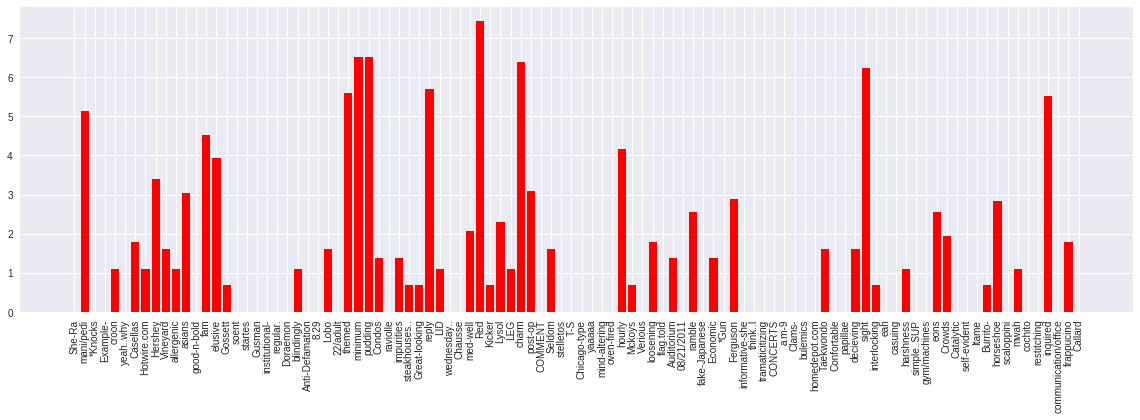

In [9]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.arange(len(random_words))                          # Get list of numbers from 0 to length of random words
plt.figure(figsize=(16,6))
plt.bar(indices, np.log(rand_words_freq), color='r')            # Plot log of frequencies with indices
plt.xticks(indices, random_words, rotation='vertical')          # Assign xticks to the labels of the random words
plt.tight_layout()                                              # Fit the plot in the figure area
plt.show()

## 4b. Histogram Frequency of POS Tag Frequencies
### Required: Plot a histogram of the frequencies of all the pos tags assigned by the tagger. For example, you can have "NN" (a noun category) occurring 4K times, etc. So, this is similar to (a) above, but seeks to get you working with POS and also see their distribution in the data.

### *Lets create a dictionary with tags as keys and dictionary of words and their counts as values. For example, if we have NN:{'abcd:10,...'} in the dictionary it implies that the word abcd was tagged in 10 of the sentences as NN. This will help us understand the distribution of tags across different words.*

In [0]:
tag_words_count = {}                                          # Create dictionary of words & counts for each tag

for word in word_tags_count.keys():                           # For all words in word_tags_count
    for key,value in word_tags_count[word].items():           # Loop through each tag,value pair
        if(key in tag_words_count.keys()):                    # Check if tag is in the dictionary
            tag_words_count[key][word]=value                  # Add the word,value pair to the tag dictionary
        else:
            tag_words_count[key]={}                           # Create a dictionary for the tag
            tag_words_count[key][word]=value                  # Add the word,value pair to the tag dictionary

### *Now, lets find the frequencies of each tag by calculating the sum of all values in their dictionary and plot them to visualize it.*

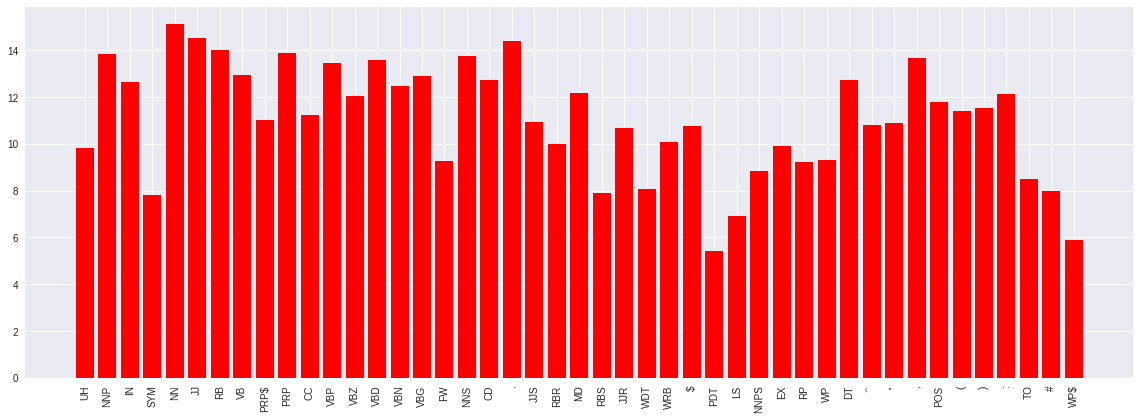

In [11]:
# Get list of all tags
all_tags = tag_words_count.keys()                                                     
# The count of each tags as sum of the values for different words
tags_count = [sum(tag_words_count[pos].values()) for pos in tag_words_count.keys()]   

# Get list of numbers from 0 to length of all tags
indices = np.arange(len(all_tags))                                                    
plt.figure(figsize=(16,6))
# Plot log of frequencies with indices
plt.bar(indices, np.log(tags_count), color='r')                                       
# Assign xticks to the labels of the all tags
plt.xticks(indices, all_tags, rotation='vertical')                                    
# Fit the plot in the figure area
plt.tight_layout()                                                                    
plt.show()

## 4c. Top 20 Adjectives
### Required: Print the top 20 adjectives in the data. (Note: adjectives are tagged "JJ" with NLTK UPenn tagset.

### *Lets define a counter object on dictionary corrosponding to 'JJ' tag to get the most common adjectives.*

In [12]:
c = Counter(tag_words_count['JJ'])          # Create counter object of dictionary for JJ tag distribution
top20_adj = c.most_common(20)               # Get the 20 most common adjectives(JJ tag)
top20_adj

[('good', 96970),
 ('great', 72814),
 ('little', 29323),
 ('nice', 28300),
 ('new', 20287),
 ('bad', 20070),
 ('much', 19720),
 ('many', 18071),
 ('first', 17298),
 ('delicious', 17156),
 ('last', 17053),
 ('sure', 16873),
 ('small', 15156),
 ('next', 15126),
 ('fresh', 14552),
 ('happy', 13855),
 ('friendly', 13659),
 ('big', 13219),
 ('hot', 13113),
 ('old', 12919)]

## 4d. Top 20 Proper Nouns
### Required: Print the top 20 proper nouns in the data. (If using UPenn tagset, proper nouns will be tagged as "NNPS").

### *Similarly, we define a counter object on dictionary corrosponding to 'NNPS' tag to get the most common Proper Nouns.*

In [13]:
c = Counter(tag_words_count['NNPS'])           # Create counter object of dictionary for NNPS tag distribution
c.most_common(20)                              # Print 20 most common proper nouns(NNPS tag)

[('Prices', 160),
 ('Americans', 160),
 ('Brothers', 149),
 ('Services', 148),
 ('States', 125),
 ('Beans', 122),
 ('Always', 109),
 ('Friends', 97),
 ('Foods', 93),
 ('Suns', 85),
 ('Trans', 80),
 ('Airlines', 79),
 ('Anyways', 77),
 ('Sundays', 74),
 ('Jewelers', 71),
 ('Asians', 69),
 ('Yelpers', 66),
 ('Thats', 58),
 ('Cleaners', 52),
 ('Airways', 50)]

## 5a. Word2vec Training
### Required: Train a word2vect or FastText model word embeddings model. Make some reasonable choices about window size, threshold of words to include, and other important model parameters. Explain these choices in the Jupyter Notebook you will submit.

### *Now, lets define & train a word2vec model on the filtered sentences (obtained after tokenizing & removing stop words).*

### *For finding the hyperparameters of word2vec model, lets first find the total number of words in our vocabulary(after removing stop words).*

In [14]:
len(all_words)                                          # Get the total number of words

210778

### *Now, lets find the average length of a sentence*

In [15]:
# Get lengths of each sentence as list
lengths = [len(i) for i in filtered_sentences]          

# Average length of sentence = Total length of sentences/Number of sentences
sum(lengths)/len(lengths)                               

24.36501127694536

### *Lets get Average frequency of a word*

In [16]:
# Get average frequency of word (sum of frequencies/no of words)
sum(wordsfreq.values())/len(wordsfreq.keys())           

49.153461160544765

### *1. For a vocabulary consisting of approximately 200k words, dimension of word vectors can be taken has 100.*
### *2. Since each sentence has average length of 24, window size can be assumed to be 10 as it covers 10 words surrounding the context word. Also, window size of 10 gives results that are more semantic in nature compared to window size of 5 as it gives results that are syntactic in nature.*
### *3. Min_count is for ignoring words having lower frequency and since average frequency of words is around 50, we choose this value as 50 in order to remove noisy words.*
### *4. Since, the corpus is large, we can use CBOW instead of Skip gram as it works better and leave sg to be default value of 0.* 
### *5. The number of iterations is set to 3 in order to keep training time lower.*  


In [0]:
# Train a word2vec model 

from gensim.models import Word2Vec
model=Word2Vec(filtered_sentences,size=100, window=10,min_count=50)             # Define a word2vec model
model.train(filtered_sentences,total_examples=len(filtered_sentences),epochs=3) # Train the model for 3 epochs
model.save("word2vec.model")                                                    # Save the model

## 5b. Most similar Adjectives
### Required: For the top 20 adjectives in the text data file you used for training your embedding model, query the embedding model for the 3 most similar words. 

### *Now, lets print the most similar words for the top 20 adjectives that we had found earlier.*

In [18]:
for word,count in top20_adj:                                     # For word and count in top20 adjectives
    print(word)
    print(model.wv.most_similar(positive = word,topn=3))           # Print word and 3 of their most similar words

good
[('decent', 0.8281090259552002), ('great', 0.7617058753967285), ('so-so', 0.7471593618392944)]
great
[('fantastic', 0.8623530864715576), ('awesome', 0.8622987866401672), ('excellent', 0.8209205269813538)]
little
[('bit', 0.8873640298843384), ('tad', 0.7941861152648926), ('kinda', 0.6544793248176575)]
nice
[('friendly', 0.7203831672668457), ('pleasant', 0.7137796878814697), ('great', 0.6392579078674316)]
new
[('newly', 0.5325199365615845), ('current', 0.5212125778198242), ('newest', 0.48027071356773376)]
bad
[('horrible', 0.7084616422653198), ('terrible', 0.7004413604736328), ('awful', 0.6622617244720459)]
much
[('actually', 0.5734549164772034), ('MUCH', 0.51764976978302), ('lot', 0.5103425979614258)]
many
[('several', 0.8038645386695862), ('numerous', 0.7983697056770325), ('countless', 0.7686682939529419)]
first
[('1st', 0.7909747958183289), ('second', 0.7833964824676514), ('First', 0.6725066304206848)]
delicious
[('delish', 0.8621597290039062), ('yummy', 0.8572527170181274), ('sc

## References:


#### 1)Downloading files from google drive
https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
#### 2)Writing to text files
https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python
#### 3)Try except continue
https://stackoverflow.com/questions/19522990/python-catch-exception-and-continue-try-block
#### 4)Counter for most frequent words
https://stackoverflow.com/questions/40050154/python-get-top-values-in-dictionary
#### 5)Removing stop words & POS tagging
https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
#### 6)Random words with seed
https://docs.python.org/3/library/random.html
#### 7)NLTK Packages download
https://stackoverflow.com/questions/34828742/how-to-download-all-packages-in-nltk-in-python
#### 8)Sum all values in dictionary
https://stackoverflow.com/questions/4880960/how-to-sum-all-the-values-in-a-dictionary
#### 9)Barplot with labels
https://stackoverflow.com/questions/45080698/make-frequency-histogram-from-list-with-tuple-elements
#### 10)Gensim Word2Vec
http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W62YVGhKjIV
